#### Forecasting Using FbProphet

# !pip install pystan


In [76]:
#!pip install pystan

In [75]:
#!pip install  fbprophet

In [89]:
### pip install pystan
### conda install -c conda-forge fbprophet
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [77]:
df=pd.read_excel('/content/CocaCola_Sales_Rawdata.xlsx')

In [78]:
df.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [81]:
quarter=['Q1','Q2','Q3','Q4']
n=df['Quarter'][0]
n[0:2]

'Q1'

In [84]:
for i in range(42):
    n=df['Quarter'][i]
    df['Quarter'][i]=n[0:2]

<ipython-input-84-6f0e3aac1aff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quarter'][i]=n[0:2]


In [85]:
df.head()

,Quarter,Sales
0,Q1,1734.827000
1,Q2,2244.960999
2,Q3,2533.804993
3,Q4,2154.962997
4,Q1,1547.818996


In [87]:
dummy=pd.DataFrame(pd.get_dummies(df['Quarter']))

In [88]:
dummy

,Q1,Q2,Q3,Q4
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0
5,0,1,0,0
6,0,0,1,0
7,0,0,0,1
8,1,0,0,0
9,0,1,0,0


In [90]:
coco=pd.concat((df,dummy),axis=1)
t= np.arange(1,43)
coco['t']=t
coco['t_square']=coco['t']*coco['t']


In [93]:
t

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42])

In [92]:
coco.head()

,Quarter,Sales,Q1,Q2,Q3,Q4,t,t_square
0,Q1,1734.827000,1,0,0,0,1,1
1,Q2,2244.960999,0,1,0,0,2,4
2,Q3,2533.804993,0,0,1,0,3,9
3,Q4,2154.962997,0,0,0,1,4,16
4,Q1,1547.818996,1,0,0,0,5,25


In [94]:
log_Sales= np.log(coco['Sales'])
coco['log_Sales']=log_Sales

In [96]:
coco.head()

,Quarter,Sales,Q1,Q2,Q3,Q4,t,t_square,log_Sales
0,Q1,1734.827000,1,0,0,0,1,1,7.458663
1,Q2,2244.960999,0,1,0,0,2,4,7.716443
2,Q3,2533.804993,0,0,1,0,3,9,7.837477
3,Q4,2154.962997,0,0,0,1,4,16,7.675529
4,Q1,1547.818996,1,0,0,0,5,25,7.344602


In [115]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [124]:
coco['Quarter']= coco['Quarter'].map({'Q1':1,'Q2':2,'Q3':3,'Q4':4})

In [143]:
coco['Q1']=coco['Q1'].astype(int)
coco['Q2']=coco['Q2'].astype(int)
coco['Q3']=coco['Q3'].astype(int)
coco['Q4']=coco['Q4'].astype(int)
coco['Sales']=coco['Sales'].astype(int)
coco['log_Sales']=coco['log_Sales'].astype(int)

In [145]:
coco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Quarter    42 non-null     int64
 1   Sales      42 non-null     int64
 2   Q1         42 non-null     int64
 3   Q2         42 non-null     int64
 4   Q3         42 non-null     int64
 5   Q4         42 non-null     int64
 6   t          42 non-null     int64
 7   t_square   42 non-null     int64
 8   log_Sales  42 non-null     int64
dtypes: int64(9)
memory usage: 3.1 KB


In [146]:
coco.head()

,Quarter,Sales,Q1,Q2,Q3,Q4,t,t_square,log_Sales
0,1,1734,1,0,0,0,1,1,7
1,2,2244,0,1,0,0,2,4,7
2,3,2533,0,0,1,0,3,9,7
3,4,2154,0,0,0,1,4,16,7
4,1,1547,1,0,0,0,5,25,7


In [162]:
X = coco.drop(['Sales'],axis =1)
y = coco['Sales']

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [164]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(28, 8)
(14, 8)
(28,)
(14,)


In [165]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [166]:
y_pred = lr.predict(X_test)
y_pred

array([3374.34116366, 2559.446945  , 1754.88908544, 3420.31621383,
       1691.87729931, 4586.92840507, 2480.66251874, 3759.35702878,
       3820.66560652, 2310.72961963, 3155.8773134 , 1879.23498186,
       2760.46047928, 2419.76752102])

In [167]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,mean_squared_log_error

In [168]:
print(r2_score(y_pred,y_test))
print(mean_squared_error(y_pred,y_test))
print(mean_squared_log_error(y_pred,y_test))
print(mean_absolute_error(y_pred,y_test))

0.962803630662015
25684.25852583892
0.003857311015844891
139.5855407230765


<Axes: >

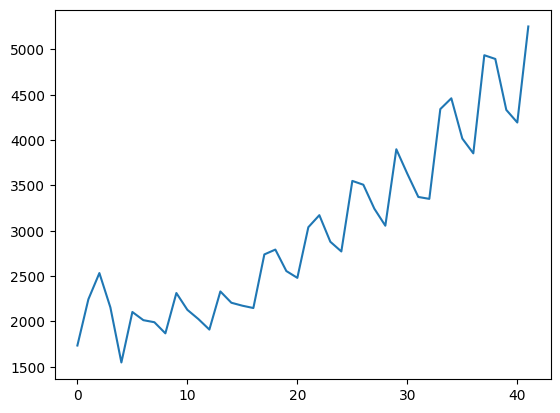

In [97]:
train= coco.head(38)
test=coco.tail(4)
coco.Sales.plot()

In [98]:
import statsmodels.formula.api as smf


In [99]:
#linear model
linear= smf.ols('Sales~t',data=train).fit()
predlin=pd.Series(linear.predict(pd.DataFrame(test['t'])))
rmselin=np.sqrt((np.mean(np.array(test['Sales'])-np.array(predlin))**2))
rmselin

421.17878760022745

In [100]:
#quadratic model
quad=smf.ols('Sales~t+t_square',data=train).fit()
predquad=pd.Series(quad.predict(pd.DataFrame(test[['t','t_square']])))
rmsequad=np.sqrt(np.mean((np.array(test['Sales'])-np.array(predquad))**2))
rmsequad


475.56183518315595

In [101]:
#exponential model
expo=smf.ols('log_Sales~t',data=train).fit()
predexp=pd.Series(expo.predict(pd.DataFrame(test['t'])))
predexp
rmseexpo=np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(predexp)))**2))
rmseexpo

466.2479731067161

In [102]:
#additive seasonality
additive= smf.ols('Sales~ Q1+Q2+Q3+Q4',data=train).fit()
predadd=pd.Series(additive.predict(pd.DataFrame(test[['Q1','Q2','Q3','Q4']])))
predadd
rmseadd=np.sqrt(np.mean((np.array(test['Sales'])-np.array(predadd))**2))
rmseadd

1860.0238154547274

In [103]:
#additive seasonality with linear trend
addlinear= smf.ols('Sales~t+Q1+Q2+Q3+Q4',data=train).fit()
predaddlinear=pd.Series(addlinear.predict(pd.DataFrame(test[['t','Q1','Q2','Q3','Q4']])))
predaddlinear


38    4292.265126
39    4066.761792
40    3961.769195
41    4639.214094
dtype: float64

In [104]:
rmseaddlinear=np.sqrt(np.mean((np.array(test['Sales'])-np.array(predaddlinear))**2))
rmseaddlinear


464.9829023982242

In [105]:
#additive seasonality with quadratic trend
addquad=smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=train).fit()
predaddquad=pd.Series(addquad.predict(pd.DataFrame(test[['t','t_square','Q1','Q2','Q3','Q4']])))
rmseaddquad=np.sqrt(np.mean((np.array(test['Sales'])-np.array(predaddquad))**2))
rmseaddquad


301.73800719349606

In [106]:
#multiplicative seasonality
mulsea=smf.ols('log_Sales~Q1+Q2+Q3+Q4',data=train).fit()
predmul= pd.Series(mulsea.predict(pd.DataFrame(test[['Q1','Q2','Q3','Q4']])))
rmsemul= np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(predmul)))**2))
rmsemul

1963.3896400779668

In [107]:
#multiplicative seasonality with linear trend
mullin= smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data=train).fit()
predmullin= pd.Series(mullin.predict(pd.DataFrame(test[['t','Q1','Q2','Q3','Q4']])))
rmsemulin=np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(predmullin)))**2))
rmsemulin

225.52439049827947

In [108]:
#multiplicative seasonality with quadratic trend
mul_quad= smf.ols('log_Sales~t+t_square+Q1+Q2+Q3+Q4',data=train).fit()
pred_mul_quad= pd.Series(mul_quad.predict(test[['t','t_square','Q1','Q2','Q3','Q4']]))
rmse_mul_quad=np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_mul_quad)))**2))
rmse_mul_quad

581.8457187963253

In [109]:
#tabulating the rmse values

data={'Model':pd.Series(['rmse_mul_quad','rmseadd','rmseaddlinear','rmseaddquad','rmseexpo','rmselin','rmsemul','rmsemulin','rmsequad']),'Values':pd.Series([rmse_mul_quad,rmseadd,rmseaddlinear,rmseaddquad,rmseexpo,rmselin,rmsemul,rmsemulin,rmsequad])}
data

Rmse=pd.DataFrame(data)
Rmse

,Model,Values
0,rmse_mul_quad,581.845719
1,rmseadd,1860.023815
2,rmseaddlinear,464.982902
3,rmseaddquad,301.738007
4,rmseexpo,466.247973
5,rmselin,421.178788
6,rmsemul,1963.389640
7,rmsemulin,225.524390
8,rmsequad,475.561835
